In [3]:
!pip install -r requirements.txt
#!jupyter nbextension install --py --sys-prefix keplergl # can be skipped for notebook 5.3 and above
#!jupyter nbextension enable --py --sys-prefix keplergl # can be skipped for notebook 5.3 and above
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager keplergl-jupyter


     |████████████████████████████████| 4.7 MB 827 kB/s eta 0:00:01
     |████████████████████████████████| 63 kB 472 kB/s eta 0:00:01
  Using cached matplotlib-3.5.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached scipy-1.8.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.6 MB)
     |████████████████████████████████| 9.9 MB 38.3 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 19.7 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 28.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 1.5 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 4.3 MB 83.5 MB/s eta 0:00:01
     |████████████████████████████████| 900 kB 1.7 MB/s eta 0:00:01


In [30]:
import pandas as pd
import geopandas


In [31]:

from plotnine import *
import seaborn as sns



In [32]:
df = pd.read_csv("data/train_sample_clean_prepared.csv")

In [33]:
df.head()

,fare_amount,pickup_year,pickup_week,pickup_day_week,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_points_km
0,10.9,2011,19,5,10,-73.972253,40.746463,-73.955485,40.764362,5,2.44
1,37.5,2014,26,3,22,-74.008180,40.707032,-73.928460,40.853647,1,17.63
2,5.7,2012,27,6,18,-73.994439,40.734462,-74.007644,40.740937,1,1.33
3,6.5,2013,39,3,21,-73.996230,40.753520,-73.987592,40.770522,1,2.03
4,5.3,2009,41,7,22,-73.989362,40.726397,-73.997931,40.719469,1,1.06


In [34]:
df.dtypes

fare_amount          float64
pickup_year            int64
pickup_week            int64
pickup_day_week        int64
pickup_hour            int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dist_points_km       float64
dtype: object

In [35]:
# est va en clean
#df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
#df["pickup_datetime"] = df['pickup_datetime'].apply(lambda x: x.weekofyear)
#df

In [36]:
# NAs por columna
df.isnull().sum()

fare_amount            0
pickup_year            0
pickup_week            0
pickup_day_week        0
pickup_hour            0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
passenger_count        0
dist_points_km       146
dtype: int64

In [37]:
# si tenemos todas las latitudes y longitudes por que tenemos NAs en dist_points_km
df[df.dist_points_km.isnull()]

# Es debido a que son los mismos puntos

,fare_amount,pickup_year,pickup_week,pickup_day_week,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_points_km
6440,9.5,2013,8,4,8,-73.960842,40.778122,-73.960842,40.778122,5,NaN
9400,4.9,2010,44,2,14,-73.965313,40.769032,-73.965313,40.769032,1,NaN
10461,13.0,2013,4,1,12,-73.985871,40.684943,-73.985871,40.684943,2,NaN
11147,5.3,2012,1,3,9,-73.937678,40.757958,-73.937678,40.757958,1,NaN
12131,10.0,2013,37,5,18,-73.885920,40.771979,-73.885920,40.771979,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
535130,17.5,2013,38,2,0,-73.989017,40.750315,-73.989017,40.750315,1,NaN
537331,4.1,2011,3,3,22,-73.987413,40.721813,-73.987413,40.721813,1,NaN
540062,6.5,2009,39,4,23,-73.988950,40.790433,-73.988950,40.790433,3,NaN
544119,12.0,2014,40,6,19,-74.008924,40.715935,-74.008924,40.715935,1,NaN


In [38]:
df[df.dist_points_km == 0]

,fare_amount,pickup_year,pickup_week,pickup_day_week,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_points_km
125,4.90,2012,22,5,14,-73.892594,40.747032,-73.892594,40.747032,1,0.0
424,45.00,2012,5,2,7,-73.789570,40.647086,-73.789570,40.647086,1,0.0
476,13.50,2013,6,6,18,-74.014500,40.749397,-74.014500,40.749397,3,0.0
482,24.94,2014,41,4,10,-73.906277,40.890751,-73.906277,40.890751,1,0.0
879,6.60,2009,16,1,22,-73.978968,40.782347,-73.978968,40.782347,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
548142,6.00,2012,40,4,14,-73.990285,40.748593,-73.990285,40.748593,1,0.0
548436,17.50,2009,28,7,18,-73.952105,40.750261,-73.952102,40.750246,1,0.0
548564,5.30,2011,12,6,14,-73.981608,40.773442,-73.981608,40.773442,2,0.0
548626,5.30,2009,19,3,17,-73.961107,40.767453,-73.961107,40.767453,1,0.0


In [41]:
# No tenemos más NAs
df.isnull().values.any()

False

In [42]:
df.shape

(548780, 11)

# EDA

In [45]:
df.describe()

,fare_amount,pickup_year,pickup_week,pickup_day_week,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_points_km
count,548780.000000,548780.000000,548780.000000,548780.00000,548780.000000,548780.000000,548780.000000,548780.000000,548780.000000,548780.000000,548780.000000
mean,11.314441,2011.736413,25.512768,4.03559,13.509574,-73.975190,40.752531,-73.917832,40.722602,1.684320,10.668727
std,9.689699,1.861427,14.929027,1.94897,6.517691,0.041330,1.069773,2.931986,1.521042,1.308668,245.912893
min,-49.570000,2009.000000,1.000000,1.00000,0.000000,-76.416667,0.000000,-736.533332,0.000000,0.000000,0.000000
25%,6.000000,2010.000000,13.000000,2.00000,9.000000,-73.992230,40.736495,-73.991563,40.735527,1.000000,1.250000
50%,8.500000,2012.000000,24.000000,4.00000,14.000000,-73.982084,40.753300,-73.980572,40.753828,1.000000,2.160000
75%,12.500000,2013.000000,39.000000,6.00000,19.000000,-73.968286,40.767545,-73.965205,40.768402,2.000000,3.910000
max,500.000000,2015.000000,53.000000,7.00000,23.000000,-72.084310,461.700000,0.002010,451.116667,6.000000,8677.360000


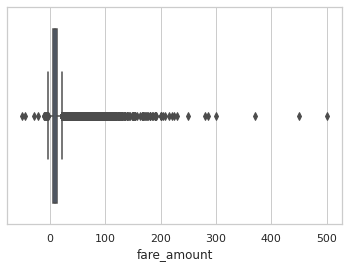

In [64]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["fare_amount"])

Lo que primero llama la atención es que en tarifa tenermos valores negativos, son descuentos?

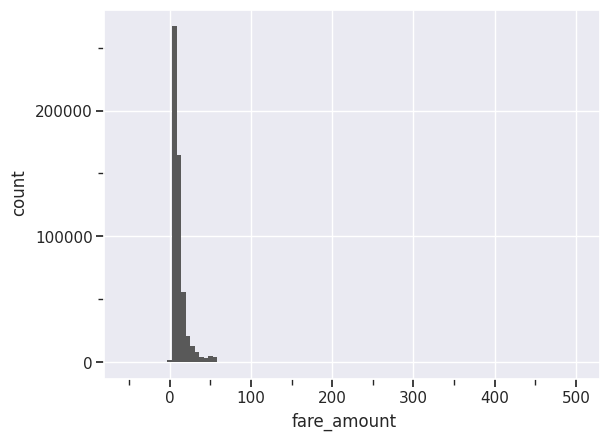

<ggplot: (8735084060938)>

In [70]:
(
    ggplot(df) 
    + geom_histogram(aes('fare_amount'), bins = 100)
    + theme_seaborn()
)

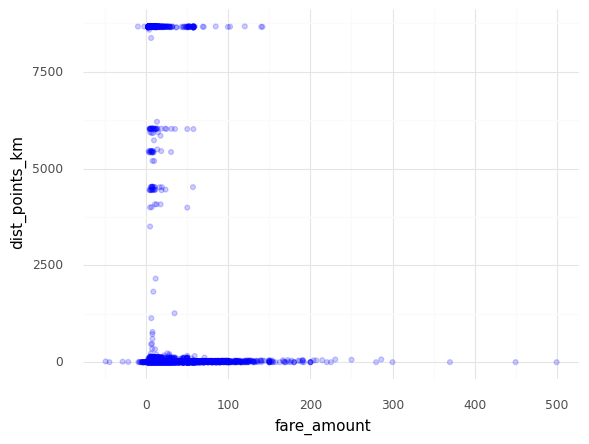

<ggplot: (8735082659859)>

In [93]:
(
    ggplot(df) 
    + geom_point(
        aes(x='fare_amount', y='dist_points_km'),
        alpha = .2,
        color = 'blue')
    + theme_minimal()
)
# Ya que las distancias no son realmente lineales, eso se ve reflejado en esta grafica

<AxesSubplot:xlabel='pickup_hour', ylabel='pickup_day_week'>

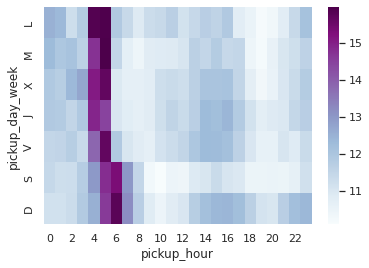

In [91]:
df_group = df.groupby(['pickup_day_week', 'pickup_hour'])['fare_amount']\
    .mean()\
    .reset_index()

df_pivot = pd.pivot_table(df_group, values='fare_amount', index=['pickup_day_week'],
                    columns=['pickup_hour'], fill_value=0)

y_axis_labels = ['L', 'M', 'X', 'J', 'V', 'S', 'D']
sns.heatmap(df_pivot, cmap="BuPu", yticklabels=y_axis_labels)

<AxesSubplot:xlabel='pickup_hour', ylabel='pickup_day_week'>

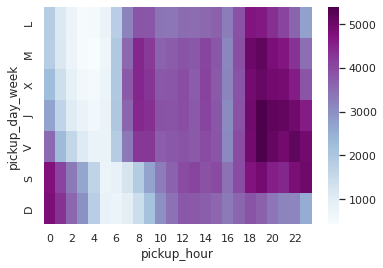

In [92]:
df_group = df.groupby(['pickup_day_week', 'pickup_hour'])['fare_amount']\
    .count()\
    .reset_index()

df_pivot = pd.pivot_table(df_group, values='fare_amount', index=['pickup_day_week'],
                    columns=['pickup_hour'], fill_value=0)

sns.heatmap(df_pivot, cmap="BuPu", yticklabels=y_axis_labels)

In [97]:
# Load an empty map
from keplergl import KeplerGl
#map_1 = KeplerGl()
#map_1

In [94]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.pickup_longitude, df.pickup_latitude))


In [8]:
#config = {
#'version': 'v1',
#'config': {
#    'mapState': {
#        'latitude': 40.75,
#        'longitude': -74,
#        'zoom': 10
#    }
#}
#}
#
#map_2 = KeplerGl(data={"data_1": gdf[1:10]}, config = config)
#map_2

#KeplerGl().save_to_html(file_name='index.html', data={"data_1": gdf[1:10]}, config = config)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'mapState': {'latitude': 40.75, 'longitude': -74, 'zoom': 10}}}, …

In [9]:
# Save map_1 config to a file
#with open('hex_config.py', 'w') as f:
#   f.write('config = {}'.format(map_2.config))


In [95]:

%run config.py

In [98]:
%run config.py
map_2 = KeplerGl(height=600, data={"data_1": gdf[1:10000]}, config = config)
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ohq60rq', 'type': …

In [99]:
KeplerGl().save_to_html(file_name='index.html', data={"data_1": gdf[1:10000]}, config = config)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to index.html!
